In [ ]:
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [2]:
import torch
import torchvision
from torchvision import datasets
from imutils import paths
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import cv2
import numpy as np

In [3]:
data_path='./'
dataset =  datasets.Caltech101(data_path, download=True)

Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=aaa37be9-563c-411a-ab97-1f08cc5a5ae3
To: /content/caltech101/101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:02<00:00, 50.2MB/s]


Extracting ./caltech101/101_ObjectCategories.tar.gz to ./caltech101


Downloading...
From (original): https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
From (redirected): https://drive.usercontent.google.com/download?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m&confirm=t&uuid=c68ba453-8458-4deb-8027-a2bc75836abb
To: /content/caltech101/Annotations.tar
100%|██████████| 14.0M/14.0M [00:00<00:00, 95.7MB/s]


Extracting ./caltech101/Annotations.tar to ./caltech101


In [4]:
image_paths = list(paths.list_images('./caltech101'))

data = []
labels = []
for img_path in tqdm(image_paths):
    label = img_path.split(os.path.sep)[-2]
    if label == "BACKGROUND_Google":
        continue
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0]*img.shape[1]
    hist = hist/size

    data.append(hist)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)

100%|██████████| 9144/9144 [00:06<00:00, 1470.75it/s]


In [5]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(f"Total Number of Classes: {len(lb.classes_)}")
print(f"Classes: {lb.classes_}")

Total Number of Classes: 101
Classes: ['Faces' 'Faces_easy' 'Leopards' 'Motorbikes' 'accordion' 'airplanes'
 'anchor' 'ant' 'barrel' 'bass' 'beaver' 'binocular' 'bonsai' 'brain'
 'brontosaurus' 'buddha' 'butterfly' 'camera' 'cannon' 'car_side'
 'ceiling_fan' 'cellphone' 'chair' 'chandelier' 'cougar_body'
 'cougar_face' 'crab' 'crayfish' 'crocodile' 'crocodile_head' 'cup'
 'dalmatian' 'dollar_bill' 'dolphin' 'dragonfly' 'electric_guitar'
 'elephant' 'emu' 'euphonium' 'ewer' 'ferry' 'flamingo' 'flamingo_head'
 'garfield' 'gerenuk' 'gramophone' 'grand_piano' 'hawksbill' 'headphone'
 'hedgehog' 'helicopter' 'ibis' 'inline_skate' 'joshua_tree' 'kangaroo'
 'ketch' 'lamp' 'laptop' 'llama' 'lobster' 'lotus' 'mandolin' 'mayfly'
 'menorah' 'metronome' 'minaret' 'nautilus' 'octopus' 'okapi' 'pagoda'
 'panda' 'pigeon' 'pizza' 'platypus' 'pyramid' 'revolver' 'rhino'
 'rooster' 'saxophone' 'schooner' 'scissors' 'scorpion' 'sea_horse'
 'snoopy' 'soccer_ball' 'stapler' 'starfish' 'stegosaurus' 'stop_s

In [6]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

x_train = x_train.reshape(len(x_train), 256)
x_val = x_val.reshape(len(x_val), 256)
x_test = x_test.reshape(len(x_test), 256)
print(len(x_train))
print(len(x_val))
print(len(x_test))


5206
1735
1736


Yêu cầu 1: Áp dụng thuật toán KNN, tính Accuracy trên tập val và testvới các giá trị k lần lượt:1,2,3,4,5

In [7]:
from sklearn.neighbors import KNeighborsClassifier

best_score = 0
best_k = 0
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score_val = knn.score(x_val, y_val)
    score_test = knn.score(x_test, y_test)
    if score_test > best_score:
        best_score = score_test
        best_k = i
    print(f'KNN with k={i}:')
    print(f'Accuracy on Validation: {score_val}, Accuracy on Test: {score_test}')
print(f"Best score = {best_score} with k = {best_k}")


KNN with k=1:
Accuracy on Validation: 0.22420749279538904, Accuracy on Test: 0.21658986175115208
KNN with k=2:
Accuracy on Validation: 0.23285302593659943, Accuracy on Test: 0.22580645161290322
KNN with k=3:
Accuracy on Validation: 0.24380403458213257, Accuracy on Test: 0.22868663594470046
KNN with k=4:
Accuracy on Validation: 0.24726224783861672, Accuracy on Test: 0.2350230414746544
KNN with k=5:
Accuracy on Validation: 0.24956772334293947, Accuracy on Test: 0.24078341013824886
Best score = 0.24078341013824886 with k = 5


Yêu cầu 2:
Áp dụng thuật toán SVC (với tham số C=1),
- Tính Accuracy cho tập test
- Tính Precision của từng lớp (class)


In [8]:
from sklearn.metrics import classification_report

In [14]:
from sklearn.svm import SVC

svc = SVC(C=1)
svc.fit(x_train, y_train)
score_test = svc.score(x_test, y_test)
# Evaluate the classifier on the validation and test sets

print(f'Accuracy on Test: {score_test}')
classification_report_test = classification_report(y_test, svc.predict(x_test), target_names=lb.classes_)
print(classification_report_test)

Accuracy on Test: 0.2569124423963134
                 precision    recall  f1-score   support

          Faces       0.08      0.30      0.13        90
     Faces_easy       0.14      0.78      0.24        85
       Leopards       0.25      0.67      0.36        36
     Motorbikes       0.42      0.76      0.54       162
      accordion       0.29      0.18      0.22        11
      airplanes       0.52      0.85      0.65       159
         anchor       0.00      0.00      0.00        12
            ant       0.00      0.00      0.00         6
         barrel       0.00      0.00      0.00         5
           bass       0.00      0.00      0.00        10
         beaver       0.00      0.00      0.00         8
      binocular       0.50      0.18      0.27        11
         bonsai       0.00      0.00      0.00        28
          brain       0.22      0.23      0.22        22
   brontosaurus       0.00      0.00      0.00         9
         buddha       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Yêu cầu 3:
Áp dụng thuật toán SVC (với tham số C=1), Sử dụng chiến lược 1 vs 1:

- Tính Accuracy cho tập test
- Tính số support vector
- Tính và hiển thị ma trận Confusion


Accuracy on Test: 0.2701612903225806
Number of support vectors per estimator: [array([229, 223], dtype=int32), array([92, 65], dtype=int32), array([52, 51], dtype=int32), array([26, 15], dtype=int32), array([ 97, 101], dtype=int32), array([35, 21], dtype=int32), array([47, 25], dtype=int32), array([71, 33], dtype=int32), array([59, 34], dtype=int32), array([78, 30], dtype=int32), array([32, 16], dtype=int32), array([82, 76], dtype=int32), array([23, 30], dtype=int32), array([47, 24], dtype=int32), array([71, 55], dtype=int32), array([62, 53], dtype=int32), array([38, 24], dtype=int32), array([94, 26], dtype=int32), array([104,  73], dtype=int32), array([46, 28], dtype=int32), array([15, 20], dtype=int32), array([53, 37], dtype=int32), array([62, 59], dtype=int32), array([87, 25], dtype=int32), array([107,  39], dtype=int32), array([94, 36], dtype=int32), array([63, 48], dtype=int32), array([113,  27], dtype=int32), array([114,  33], dtype=int32), array([79, 25], dtype=int32), array([84

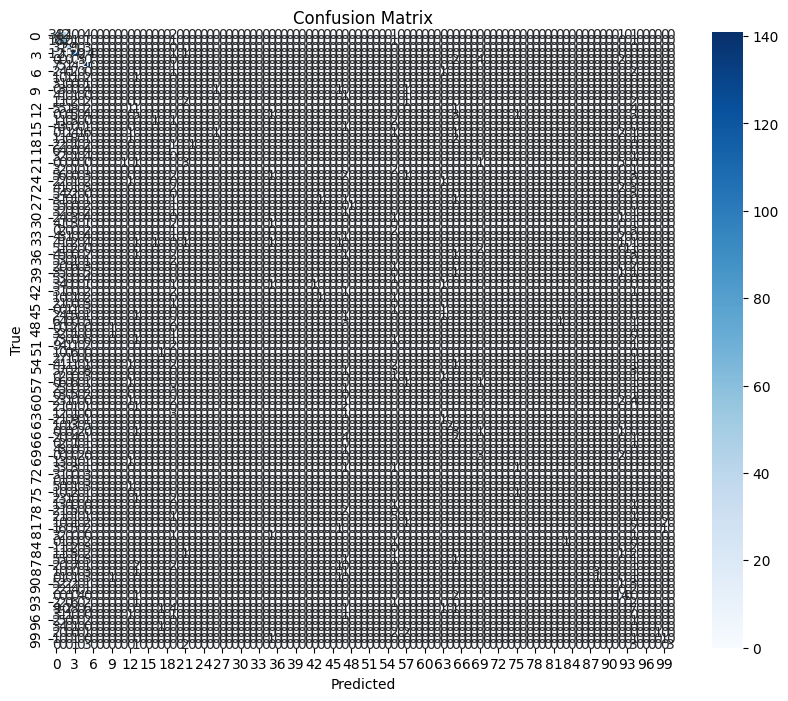

In [17]:

from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sns

ovo_clf = OneVsOneClassifier(SVC(C=1))
ovo_clf.fit(x_train, y_train)
score_test = ovo_clf.score(x_test, y_test)
print(f'Accuracy on Test: {score_test}')

n_support_per_estimator = [estimator.n_support_ for estimator in ovo_clf.estimators_]
print("Number of support vectors per estimator:", n_support_per_estimator)

total_support_vectors = sum(sum(n) for n in n_support_per_estimator)
print("Total number of support vectors (estimated):", total_support_vectors)

# Compute the confusion matrix
cm = confusion_matrix(y_test, ovo_clf.predict(x_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Yêu cầu 4:
Áp dụng thuật toán SVC (với tham số C=1), Sử dụng chiến lược 1 vs rest:
- Tính Accuracy cho tập test
- Tính số support vector
- Tính và hiển thị ma trận Confusion


Accuracy on Test (OneVsRest): 0.24078341013824886
Number of support vectors per estimator: [array([590, 254], dtype=int32), array([544, 272], dtype=int32), array([152, 122], dtype=int32), array([584, 407], dtype=int32), array([63, 30], dtype=int32), array([531, 387], dtype=int32), array([212,  24], dtype=int32), array([233,  25], dtype=int32), array([342,  33], dtype=int32), array([357,  34], dtype=int32), array([257,  30], dtype=int32), array([77, 17], dtype=int32), array([563,  76], dtype=int32), array([292,  50], dtype=int32), array([228,  27], dtype=int32), array([372,  59], dtype=int32), array([488,  55], dtype=int32), array([173,  26], dtype=int32), array([191,  26], dtype=int32), array([198,  76], dtype=int32), array([285,  28], dtype=int32), array([178,  37], dtype=int32), array([271,  40], dtype=int32), array([476,  60], dtype=int32), array([187,  25], dtype=int32), array([229,  39], dtype=int32), array([464,  38], dtype=int32), array([502,  48], dtype=int32), array([223,  27]

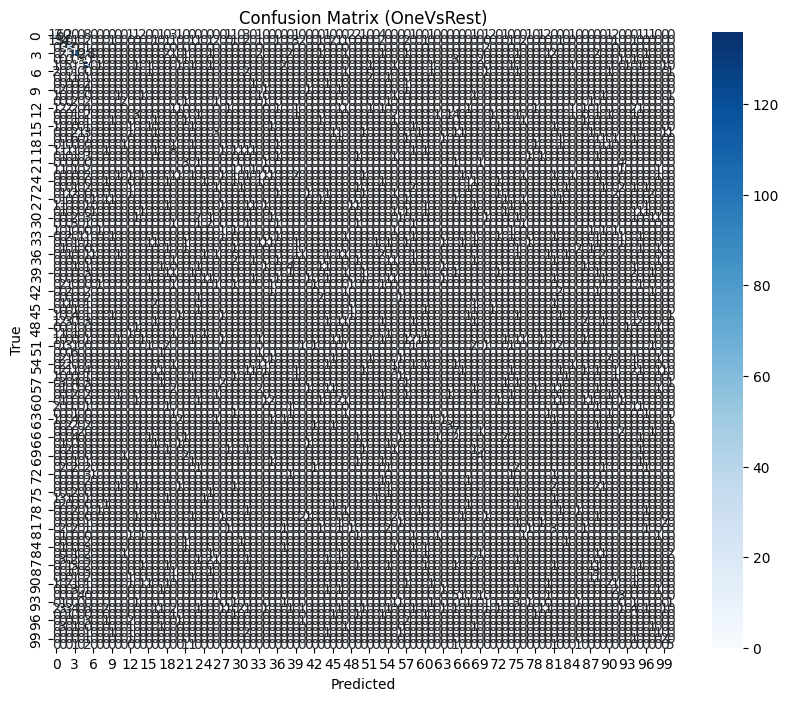

In [18]:

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(C=1))
ovr_clf.fit(x_train, y_train)
score_test = ovr_clf.score(x_test, y_test)
print(f'Accuracy on Test (OneVsRest): {score_test}')

# For OneVsRestClassifier, n_support_ is not directly available.
# We can estimate it by looking at the support vectors of each estimator.

n_support_per_estimator = [estimator.n_support_ for estimator in ovr_clf.estimators_]
print("Number of support vectors per estimator:", n_support_per_estimator)

total_support_vectors = sum(sum(n) for n in n_support_per_estimator)
print("Total number of support vectors (estimated):", total_support_vectors)

# Compute the confusion matrix
cm = confusion_matrix(y_test, ovr_clf.predict(x_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (OneVsRest)")
plt.show()

Yêu cầu 5:
Áp dụng thuật toán SVC:
- Xác định giá trị tham số C để đạt được Accuracy tốt nhất

In [21]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for C
param_grid = {'C': [0.1, 1, 10, 100]}

# Create an SVC classifier
svc = SVC()

# Perform GridSearchCV to find the best C
grid_search = GridSearchCV(svc, param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_svc = grid_search.best_estimator_
test_accuracy = best_svc.score(x_test, y_test)
print("Test accuracy with best C:", test_accuracy)

Best hyperparameters: {'C': 10}
Best validation score: 0.2833278941516813
Test accuracy with best C: 0.27246543778801846
